###      <u>                             EMAIL SPAM CLASSIFICATION


<p><b>Loading the dataset</b></p>

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel(r"C:\Users\ADMIN\Desktop\PD lab\spam_base_1.xlsx",names = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average","capital_run_length_longest","capital_run_length_total","Result"])

In [3]:
#data.head()

In [4]:
data.shape

(4600, 58)

<p><b>Segregating Input and Output attributes</b></p>

In [5]:
X_in = data.drop(["Result"],axis=1)

In [6]:
Y_out = data["Result"]

<p><b>Splitting data into training and testing sets</b></p>

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X_in,Y_out,test_size=0.30,random_state=101)

<p><b>Preprocessng the data</b></p>

In [9]:
from sklearn import preprocessing  

In [10]:
XX_train = preprocessing.scale(X_train)

XX_test = preprocessing.scale(X_test)

### NEURAL NETWORKS

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
nn = MLPClassifier(hidden_layer_sizes = (57,57,57,57,57),max_iter = 900)

<p><b>Training the Classifier with training set - Creating a model</b></p>

In [13]:
model_nn = nn.fit(XX_train,Y_train)

<p><b> Testing the model with testing set </b></p>

In [14]:
Yp_nn = model_nn.predict(XX_test)

<p><b> Calculating Accuracy score for NEURAL NETWORKS </b></p>

In [15]:
from sklearn.metrics import accuracy_score             

In [16]:
acc_nn = accuracy_score(Yp_nn,Y_test)

### K-NEAREST NEIGHBORS 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier()

#### Training the Classifier - creating a model

In [19]:
model_knn = knn.fit(XX_train,Y_train)

#### Testing the model with testing set

In [20]:
Yp_knn = model_knn.predict(XX_test)

#### Calculating Accuracy Score for KNN

In [21]:
acc_knn = accuracy_score(Yp_knn,Y_test)

### SUPPORT VECTOR MACHINES

In [22]:
from sklearn.svm import SVC

In [23]:
svm = SVC(gamma = 0.001)

#### Training the Classifier - creating a model

In [24]:
model_svm = svm.fit(XX_train,Y_train)


#### Testing the model with testing set

In [25]:
Yp_svm = model_svm.predict(XX_test)

#### Calculating Accuracy Score for SVM

In [26]:
acc_svm = accuracy_score(Yp_svm,Y_test)

### NAIVE BAYES

In [27]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [28]:
gau = GaussianNB()
ber = BernoulliNB()
mul = MultinomialNB()

#### Training the Classifiers with training set - creating models 

In [29]:
model_gau = gau.fit(X_train,Y_train)
model_ber = ber.fit(X_train,Y_train)
model_mul = mul.fit(X_train,Y_train)

#### Testing the models with testing set 

In [30]:
Yp_gau = model_gau.predict(X_test) 
Yp_ber = model_ber.predict(X_test) 
Yp_mul = model_mul.predict(X_test) 

#### Calculating Accuracy Scores for Naive Bayes Classifiers

In [31]:
acc_gau = accuracy_score(Y_test,Yp_gau)
acc_ber = accuracy_score(Y_test,Yp_ber)
acc_mul = accuracy_score(Y_test,Yp_mul)

### Displaying Accuracy Scores of all the above algorithms 

In [32]:
print("Accuracy of Neural Networks : {} \nAccuracy of KNN : {} \nAccuracy of SVM : {} \nAccuracy of Gaussian : {} \nAccuracy of Bernolli : {} \nAccuracy of Multinomial : {}".format(acc_nn,acc_knn,acc_svm,acc_gau, acc_ber, acc_mul))

Accuracy of Neural Networks : 0.9398550724637681 
Accuracy of KNN : 0.9152173913043479 
Accuracy of SVM : 0.9130434782608695 
Accuracy of Gaussian : 0.8268115942028985 
Accuracy of Bernolli : 0.8985507246376812 
Accuracy of Multinomial : 0.7891304347826087


### Plotting the Accuracy scores

In [33]:
from matplotlib import pyplot as plt

In [34]:
import numpy as np

In [35]:
scores = [acc_nn,acc_knn,acc_svm,acc_gau, acc_ber, acc_mul]
scores = np.array(scores)
scores = scores*100

In [36]:
label = ["NN", "KNN", "SVM", "GAU", "BER", "MUL"]

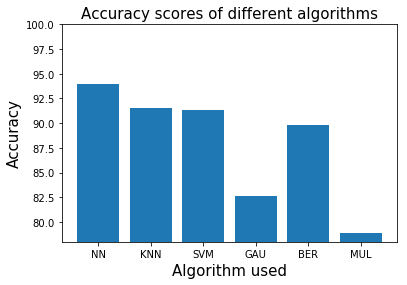

In [37]:
index = np.arange(len(label))
plt.bar(index, scores)
plt.xlabel('Algorithm used', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=10)
plt.title('Accuracy scores of different algorithms',fontsize=15)
plt.ylim(78,100)
plt.show()